In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models

In [2]:
BATCH_SIZE= 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 10

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillageFinal",
    seed = 123,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 7075 files belonging to 8 classes.


In [4]:
class_names=dataset.class_names
class_names

['Others',
 'Pepper_bell_Bacterial_spot',
 'Pepper_bell_healthy',
 'Potato_Early_blight',
 'Potato_healthy',
 'Tomato_Early_blight',
 'Tomato_YellowLeaf_Curl_Virus',
 'Tomato_healthy']

In [5]:
len(dataset)

222

In [6]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[5 2 7 6 1 6 1 7 5 0 2 1 0 1 2 3 5 7 1 0 0 7 1 7 1 5 5 1 2 2 7 1]


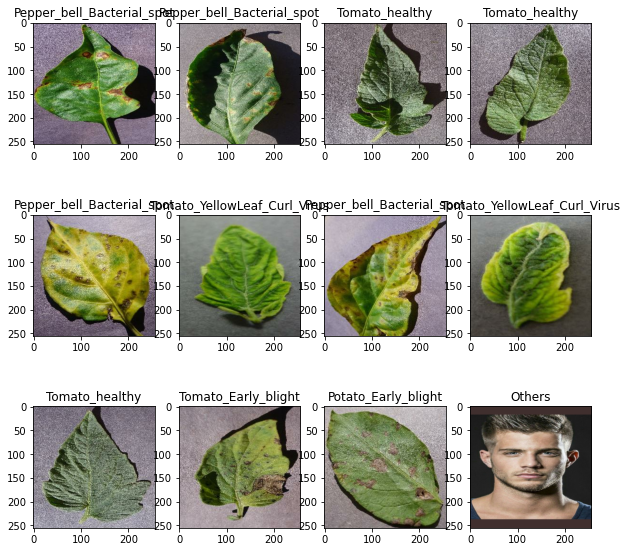

In [7]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.title(class_names[labels_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))

In [8]:
train_size=0.8
len(dataset)*train_size

177.60000000000002

In [9]:
train_ds=dataset.take(177)
len(train_ds)

177

In [10]:
test_ds=dataset.skip(177)
len(test_ds)

45

In [11]:
val_ds=test_ds.take(45)
len(val_ds)

45

In [12]:
test_ds=test_ds.skip(45)
len(test_ds)

0

In [13]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(ds_size*train_split)
    val_size = int(ds_size*val_split)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds)

177

In [16]:
len(val_ds)

22

In [17]:
len(test_ds)

23

In [18]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

In [19]:
data_augmentation= tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [20]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 8
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation = "relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax"),
])
model.build(input_shape=input_shape)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [22]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data = val_ds,
    verbose = 1,
    epochs = EPOCHS
)

Epoch 1/10
177/177 [==============================] - 576s 3s/step - loss: 1.3365 - accuracy: 0.4940 - val_loss: 0.8641 - val_accuracy: 0.6761
Epoch 2/10
177/177 [==============================] - 629s 3s/step - loss: 0.6644 - accuracy: 0.7758 - val_loss: 0.4545 - val_accuracy: 0.8423
Epoch 3/10
177/177 [==============================] - 687s 4s/step - loss: 0.4465 - accuracy: 0.8506 - val_loss: 0.3952 - val_accuracy: 0.8636
Epoch 4/10
177/177 [==============================] - 580s 3s/step - loss: 0.4056 - accuracy: 0.8662 - val_loss: 0.2225 - val_accuracy: 0.9176
Epoch 5/10
177/177 [==============================] - 453s 2s/step - loss: 0.3085 - accuracy: 0.8932 - val_loss: 0.2498 - val_accuracy: 0.9176
Epoch 6/10
177/177 [==============================] - 430s 2s/step - loss: 0.2528 - accuracy: 0.9134 - val_loss: 0.2209 - val_accuracy: 0.9261
Epoch 7/10
177/177 [==============================] - 450s 2s/step - loss: 0.2092 - accuracy: 0.9246 - val_loss: 0.2069 - val_accuracy: 0.9361

In [24]:
scores = model.evaluate(test_ds)

23/23 [==============================] - 27s 588ms/step - loss: 0.1470 - accuracy: 0.9484


In [25]:
history

In [26]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 177}

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
type(history.history["loss"])

list

In [29]:
len(history.history["loss"])

10

In [30]:
history.history["loss"][:5]

[1.3365002870559692,
 0.6643853783607483,
 0.4465354382991791,
 0.40561121702194214,
 0.30852165818214417]

In [31]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

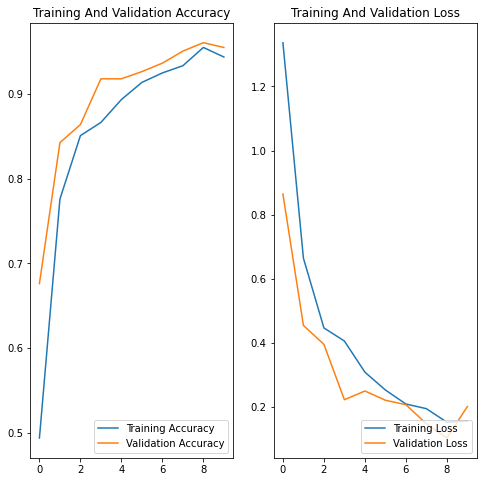

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label = "Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training And Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label = "Training Loss")
plt.plot(range(EPOCHS),val_loss,label = "Validation Loss")
plt.legend(loc = "lower right")
plt.title("Training And Validation Loss")
plt.show()

First image to predict
Actual Label:  Potato_Early_blight
Predicted Label:  Potato_Early_blight


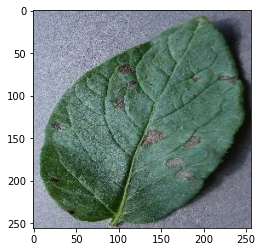

In [33]:
for images_batch,labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label: ",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted Label: ",class_names[np.argmax(batch_prediction[0])])

### Prediction

In [18]:
import keras
model=keras.models.load_model("Potato_Pepper_Tomato_Other_Disease_Classification.h5")

In [34]:
def predict(model,img):
#     img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())#this line is used when we use random images for test
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

time.struct_time(tm_year=2022, tm_mon=8, tm_mday=13, tm_hour=17, tm_min=4, tm_sec=24, tm_wday=5, tm_yday=225, tm_isdst=0)
time.struct_time(tm_year=2022, tm_mon=8, tm_mday=13, tm_hour=17, tm_min=4, tm_sec=24, tm_wday=5, tm_yday=225, tm_isdst=0)


(-0.5, 255.5, 255.5, -0.5)

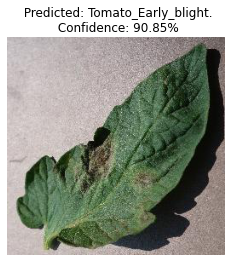

In [12]:
import glob,random
import time
from tensorflow import keras
image = keras.preprocessing.image
import numpy as np
# model.save('Psoriasis_disease_classification.h5')
model = keras.models.load_model('Potato_Pepper_Tomato_Disease_Classification.h5')


TestImage= glob.glob("C:\\Users\\lenovo\\Documents\\potato_disease\\test\\*")
# plt.imshow(img.numpy.().astype("uint8"))
# img = image.load_img(test, target_size=(256, 256))
# plt.imshow(img.numpy.().astype("uint8"))
images = glob.glob(random.choice(TestImage))
random_image = random.choice(images)

img = image.load_img(random_image, target_size=(256, 256))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# images1 = np.vstack([x])
# plt.imshow(img.astype("uint8"))
plt.imshow(img)
start=time.localtime()
print(start)
predicted_class, confidence = predict(model, img)
end = time.localtime()
print(end)
plt.title(f" Predicted: {predicted_class}.\n Confidence: {confidence}%")
plt.axis("off")

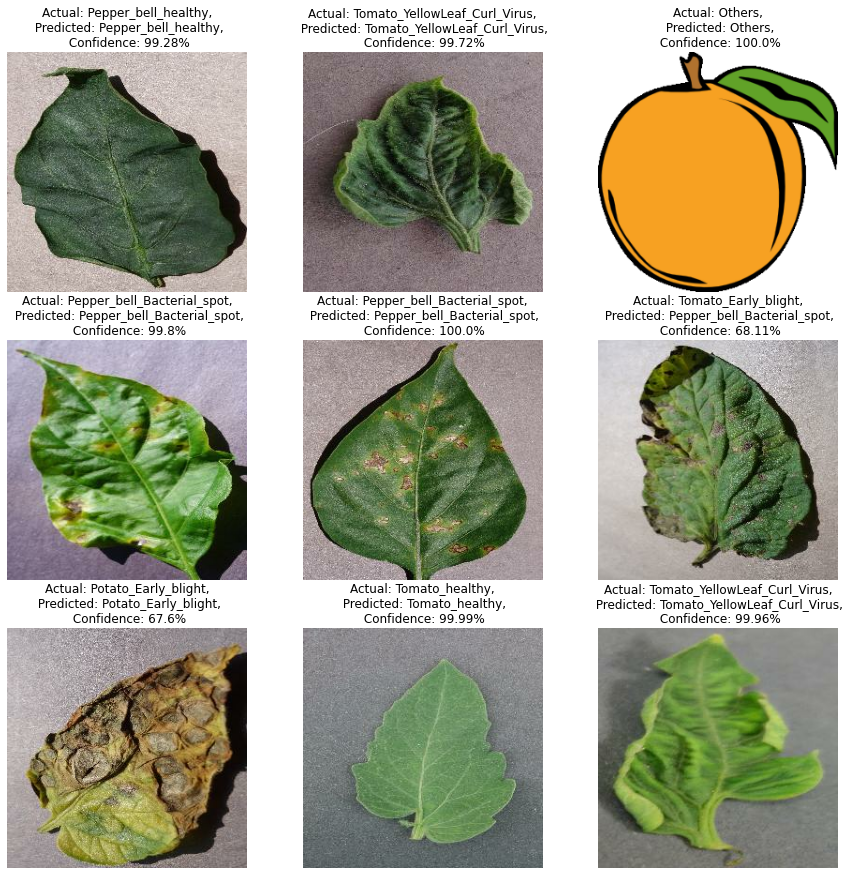

In [35]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(12):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}%")
        plt.axis("off")

In [36]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+3
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/6\assets


In [37]:
model.save("Potato_Pepper_Tomato_Other_Disease_Classification_final.h5")
import json
with open("Potato_Pepper_Tomato_Other_Class_dictionary_final.json","w") as f:
    f.write(json.dumps(class_names))


In [1]:
!pip install gradio


  Using cached python-multipart-0.0.5.tar.gz (32 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached starlette-0.19.1-py3-none-any.whl (63 kB)
  Using cached anyio-3.6.1-py3-none-any.whl (80 kB)
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=1c85bd959af16e639b63b6b7f832a8eaf5c23cb659d2c3e77909058047d998a4
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\91\e2\96\f676aa08bfd789328c6576cd0f1fde4a3d686703bb0c247697
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=cccd5527e585c19ef7c930910bc332561b032629e34902db1f9c80a2b73f7e08
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\fe\04\d1\a10661cc45f03c3cecda50deb2d2c22f57b4e84a75b2a5987e
Successfully built ffmpy python-multipart
  Attempting uninstall: anyio
    Found existing installation: anyio 2.2.0
    Uninstalling anyio-2.2.0:
      Successfully uninstalled anyio-2.2.0


In [16]:
# import gradio  as gr

In [34]:
# def interface_predict(inp):
#     img_array = tf.keras.preprocessing.image.img_to_array(inp)
#     img_array = tf.expand_dims(img_array,0)
#     predictions = model.predict(img_array)
#     predicted_class = class_names[np.argmax(predictions[0])]
#     confidence = round(100*(np.max(predictions[0])),2)
#     pre = predicted_class+" confidence :: "+str(confidence);
#     return pre


In [20]:
# demo = gr.Interface(fn=interface_predict, inputs="image", outputs="label")
# demo.launch(share = True)